In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def process_time(s):
    # print(s)
    m, s = s.split("m")
    # print(int(m) * 60 + float(s.split("s")[0]))
    return int(m) * 60 + float(s.split("s")[0])
    
process_time("1m11.773s")

71.773

In [201]:
data = []
# n = 5

print(total_possible_edges)
with open('output_both_log.txt' , "r") as f:
    lines = []
    for line in f:
        if line.startswith(("Running", "real", "user", "sys", "sgraph")):
            lines.append(line)

    for i in range(0, len(lines) // 8 * 8, 8):
        m = lines[i].split(" ")[2].split("=")[1]
        real_ipce = process_time(lines[i+1].split("\t")[1])
        user_ipce = process_time(lines[i+2].split("\t")[1])
        sys_ipce = process_time(lines[i+3].split("\t")[1])


        real_pce = process_time(lines[i+5].split("\t")[1])
        user_pce = process_time(lines[i+6].split("\t")[1])
        sys_pce = process_time(lines[i+7].split("\t")[1])


        _, nodes, edges, _ = lines[i+4].split(",")
        nodes = int(nodes.split(" ")[1])
        total_possible_edges = nodes * (nodes-1) / 2
        
        edges = int(edges.split(" ")[1])

        res = {
            "node_count": nodes,
            "m" : m,
            "edges": edges,
            "density" : round(edges / total_possible_edges, 2) ,
            "ipce_time" : user_ipce + sys_ipce,
            
            "pce_time" : user_pce + sys_pce
        }
        res["runtime_ratio"] = res["pce_time"] / res["ipce_time"]
        data.append(res)
        
   
        
df = pd.DataFrame(data)
df

4950.0


,node_count,m,edges,density,ipce_time,pce_time,runtime_ratio
0,100,10,900,0.18,0.006,0.006,1.000000
1,100,15,1275,0.26,0.036,0.045,1.250000
2,100,20,1600,0.32,0.373,0.471,1.262735
3,100,25,1875,0.38,2.991,3.934,1.315279
4,100,30,2100,0.42,24.612,32.814,1.333252
5,100,35,2275,0.46,306.762,395.279,1.288553


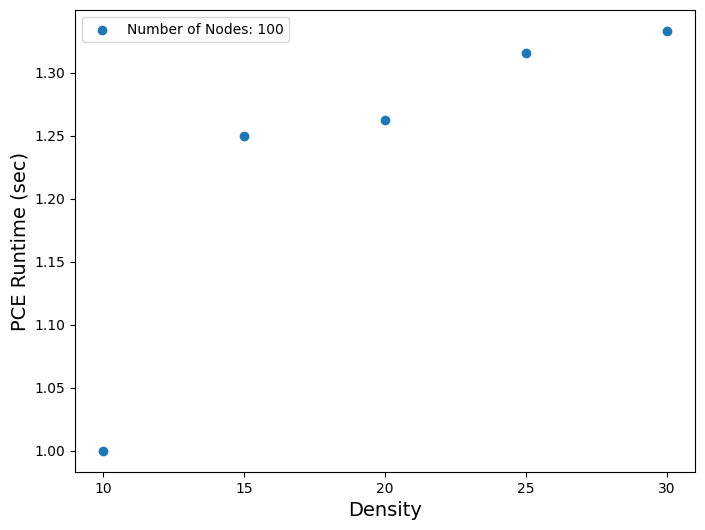

In [198]:
plt.figure(figsize=(8, 6))
plt.scatter(
        df["m"], 
        df["runtime_ratio"],
        label=f"Number of Nodes: {100}"    
    )
plt.xlabel("Density", fontsize=14)
plt.ylabel("PCE Runtime (sec)", fontsize=14)
plt.legend() # fontsize=8,loc="upper left",  bbox_to_anchor=(1.05, 1))
plt.savefig("3_density_runtime.png", dpi=300, bbox_inches="tight")
plt.show()

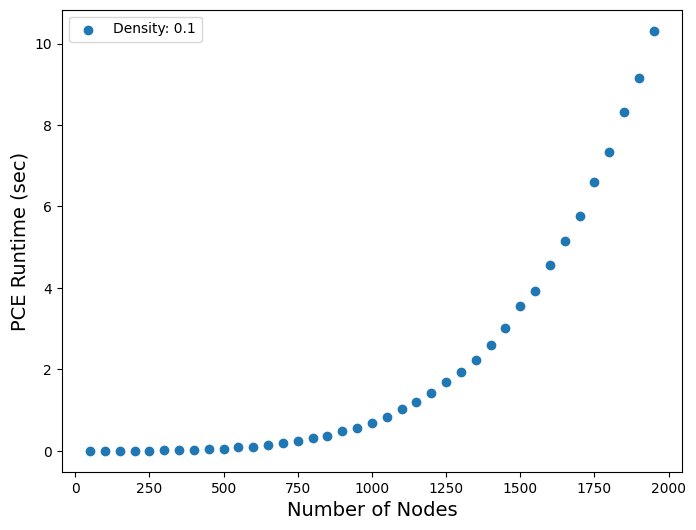

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(
        df["node_count"], 
        df["pce_time"],
        label=f"Density: {0.1}"    
    )
plt.xlabel("Number of Nodes", fontsize=14)
plt.ylabel("PCE Runtime (sec)", fontsize=14)
plt.legend() # fontsize=8,loc="upper left",  bbox_to_anchor=(1.05, 1))
plt.savefig("4_count_runtime.png", dpi=300, bbox_inches="tight")
plt.show()

In [129]:
df.to_csv(f"csv_output_multi_nodes_multi_desnity_100_1000_001_30.csv")

In [132]:
# df = pd.read_csv("csv_output_multi_nodes_multi_desnity_100_500_001_35.csv")

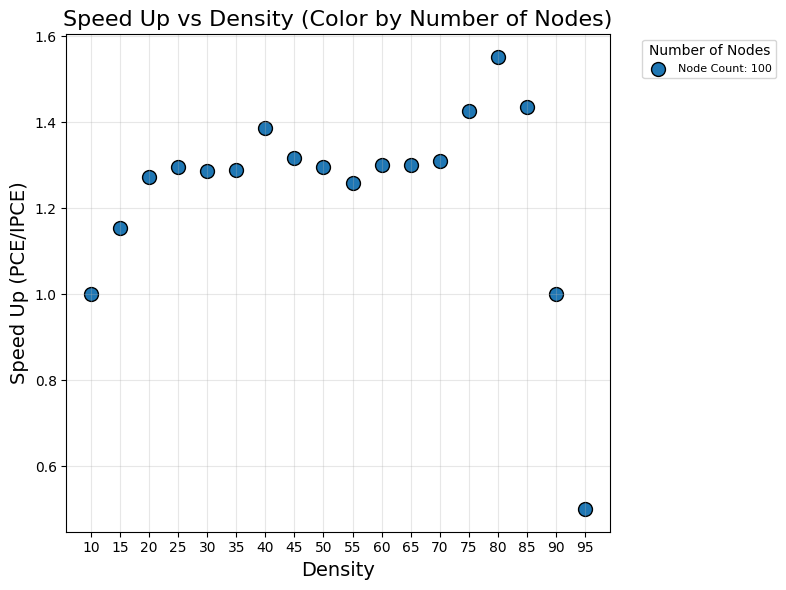

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Get unique node counts and create a color map
unique_node_counts = df["node_count"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_node_counts)))  # Use a distinct colormap

# Create a color mapping (node_count -> color)
color_mapping = {node: color for node, color in zip(unique_node_counts, colors)}

# Scatter plot
plt.figure(figsize=(8, 6))
for node_count in unique_node_counts:
    # Filter the data for the current node_count
    subset = df[df["node_count"] == node_count]
    plt.scatter(
        subset["density"], 
        subset["runtime_ratio"], 
        color=color_mapping[node_count], 
        label=f"Node Count: {node_count}", 
        s=100, edgecolor="k")
    
# Add labels, legend, and  title
plt.xlabel("Density", fontsize=14)
plt.ylabel("Speed Up (PCE/IPCE)", fontsize=14)
plt.title("Speed Up vs Density (Color by Number of Nodes)", fontsize=16)
plt.legend(title="Number of Nodes", fontsize=8,loc="upper left",  bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()
# plt.savefig("1_density vs speed up.png", dpi=300, bbox_inches="tight")

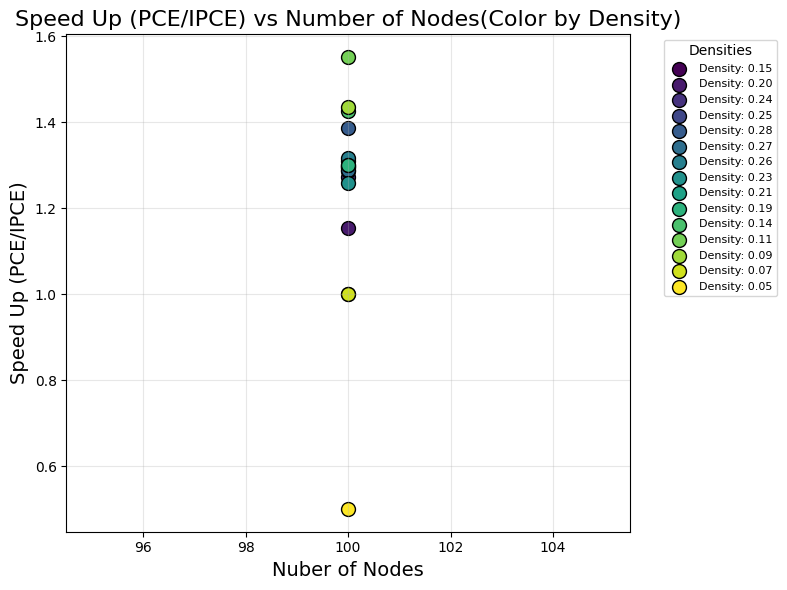

In [179]:
# Get unique densities and create a color map
unique_densities = df["density"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_densities)))  # Use a colormap

# Create a color mapping (density -> color)
color_mapping = {density: color for density, color in zip(unique_densities, colors)}

# Scatter plot
plt.figure(figsize=(8, 6))
for density in unique_densities:
    # Filter the data for the current density
    subset = df[df["density"] == density]
    plt.scatter(
        subset["node_count"], 
        subset["runtime_ratio"], 
        color=color_mapping[density], 
        label=f"Density: {density:.2f}", 
        s=100, 
        edgecolor="k"
    )

# Add labels, legend, and title
plt.xlabel("Nuber of Nodes", fontsize=14)
plt.ylabel("Speed Up (PCE/IPCE)", fontsize=14)
plt.title("Speed Up (PCE/IPCE) vs Number of Nodes(Color by Density)", fontsize=16)
plt.legend(title="Densities", fontsize=8,loc="upper left",  bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

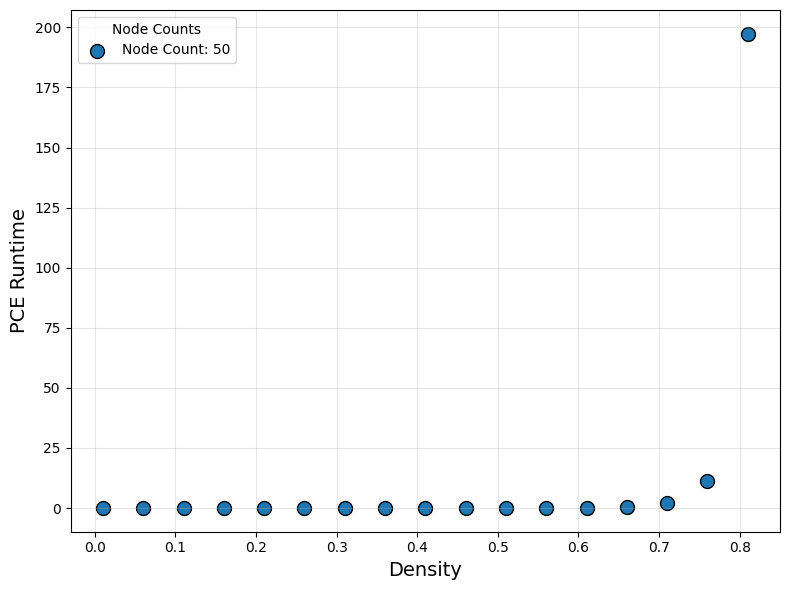

In [146]:
# Get unique node counts and create a color map
unique_node_counts = df["node_count"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_node_counts)))  # Use a distinct colormap

# Create a color mapping (node_count -> color)
color_mapping = {node: color for node, color in zip(unique_node_counts, colors)}

# Scatter plot
plt.figure(figsize=(8, 6))
for node_count in unique_node_counts:
    # Filter the data for the current node_count
    subset = df[df["node_count"] == node_count]
    plt.scatter(
        subset["density"], 
        subset["pce_time"], 
        color=color_mapping[node_count], 
        label=f"Node Count: {node_count}", 
        s=100, 
        edgecolor="k"
    )

# Add labels, legend, and title
plt.xlabel("Density", fontsize=14)
plt.ylabel("PCE Runtime", fontsize=14)
# plt.title("Runtime vs Density (Color by Node Count)", fontsize=16)
plt.legend(title="Node Counts", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("3_runtime_expo_density.png", dpi=300, bbox_inches="tight")


# Show plot
plt.show()


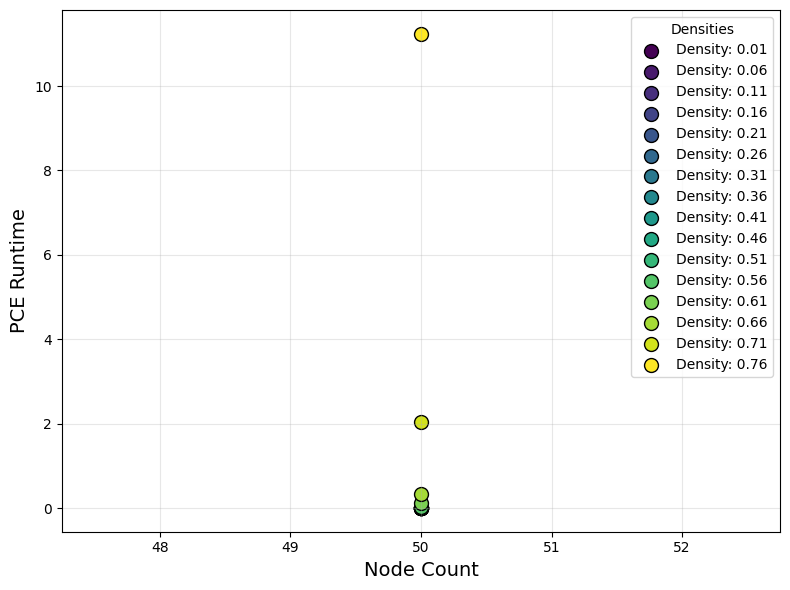

In [139]:
# Get unique densities and create a color map
unique_densities = df["density"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_densities)))  # Use a colormap

# Create a color mapping (density -> color)
color_mapping = {density: color for density, color in zip(unique_densities, colors)}

# Scatter plot
plt.figure(figsize=(8, 6))
for density in unique_densities:
    # Filter the data for the current density
    subset = df[df["density"] == density]
    plt.scatter(
        subset["node_count"], 
        subset["pce_time"], 
        color=color_mapping[density], 
        label=f"Density: {density:.2f}", 
        s=100, 
        edgecolor="k"
    )

# Add labels, legend, and title
plt.xlabel("Node Count", fontsize=14)
plt.ylabel("PCE Runtime", fontsize=14)
# plt.title("Runtime vs Node Count (Color by Density)", fontsize=16)
plt.legend(title="Densities", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

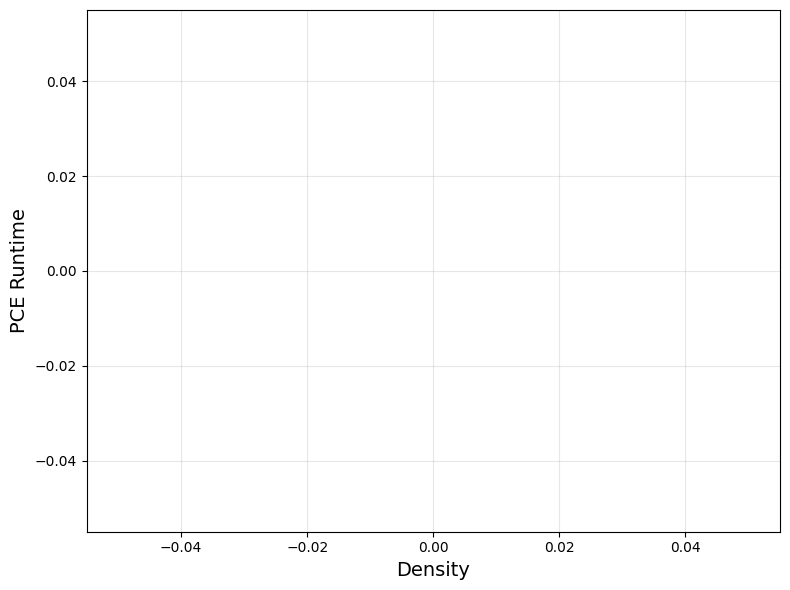

In [138]:
# Filter the data for node_count == 1000
filtered_data = df[df["node_count"] == 1000]

# Plot density vs. pce_time
plt.figure(figsize=(8, 6))
plt.scatter(
    filtered_data["density"], 
    filtered_data["pce_time"], 
    color="blue", 
    s=100, 
    edgecolor="k"
)

# Add labels, title, and grid
plt.xlabel("Density", fontsize=14)
plt.ylabel("PCE Runtime", fontsize=14)
# plt.title("Density vs Runtime (Number of Nodes = 100)", fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()


# Show plot
# plt.save
plt.show()


In [119]:
color_mapping

{np.int64(100): array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 np.int64(149): array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 np.int64(150): array([1.        , 0.49803922, 0.05490196, 1.        ]),
 np.int64(200): array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 np.int64(250): array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 np.int64(300): array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 np.int64(350): array([0.58039216, 0.40392157, 0.74117647, 1.        ]),
 np.int64(400): array([0.54901961, 0.3372549 , 0.29411765, 1.        ]),
 np.int64(450): array([0.54901961, 0.3372549 , 0.29411765, 1.        ]),
 np.int64(500): array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 np.int64(600): array([0.49803922, 0.49803922, 0.49803922, 1.        ]),
 np.int64(700): array([0.49803922, 0.49803922, 0.49803922, 1.        ]),
 np.int64(800): array([0.7372549 , 0.74117647, 0.13333333, 1.        ]),
 np.int64(900): array([0.09019608, 0.74509804, 0.81

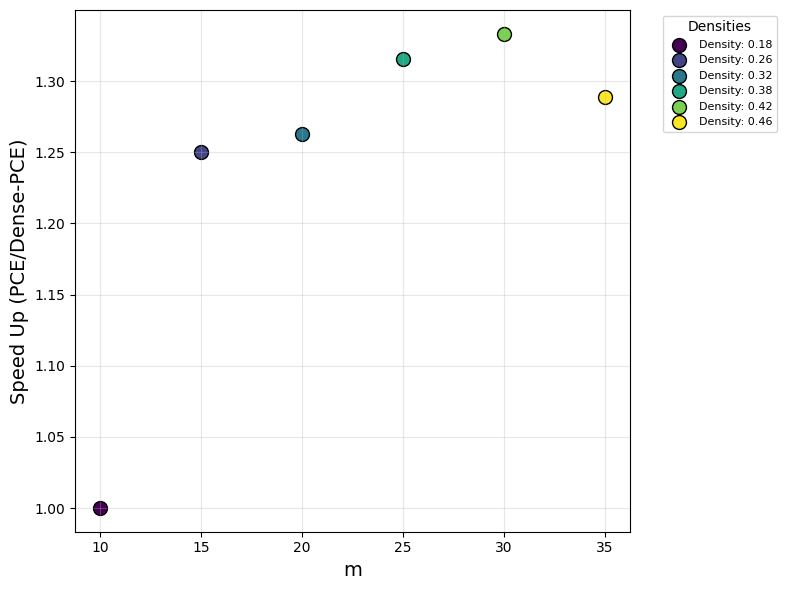

In [202]:
# Get unique densities and create a color map
unique_densities = df["density"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_densities)))  # Use a colormap

# Create a color mapping (density -> color)
color_mapping = {density: color for density, color in zip(unique_densities, colors)}

# Scatter plot
plt.figure(figsize=(8, 6))
for density in unique_densities:
    # Filter the data for the current density
    subset = df[df["density"] == density]
    plt.scatter(
        subset["m"], 
        subset["runtime_ratio"], 
        color=color_mapping[density], 
        label=f"Density: {density:.2f}", 
        s=100, 
        edgecolor="k"
    )

# Add labels, legend, and title
plt.xlabel("m", fontsize=14)
plt.ylabel("Speed Up (PCE/Dense-PCE)", fontsize=14)
# plt.title("Speed Up (PCE/IPCE) vs Number of Nodes(Color by Density)", fontsize=16)
plt.legend(title="Densities", fontsize=8,loc="upper left",  bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("5.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

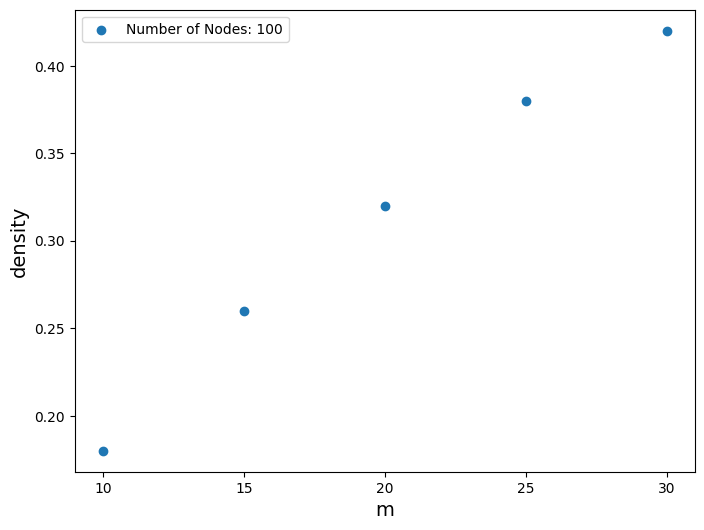

In [200]:
plt.figure(figsize=(8, 6))
plt.scatter(
        df["m"], 
        df["density"],
        label=f"Number of Nodes: {100}"    
    )
plt.xlabel("m", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.legend() # fontsize=8,loc="upper left",  bbox_to_anchor=(1.05, 1))
plt.savefig("6.png", dpi=300, bbox_inches="tight")
plt.show()